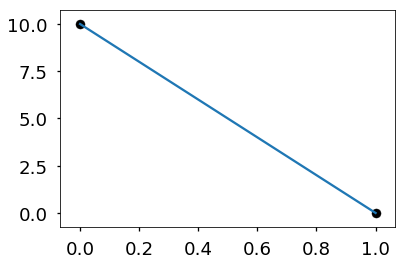

In [5]:
import numpy as np
import gpflow
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("talk", font_scale = 1.4)
X = np.linspace(0.,1, 2)[:,None]
X_prime = np.linspace(0, 1, 20)[:,None]
values = np.zeros(X_prime.shape[0])
Y = 10 - 10*X

plt.plot(X, Y)
plt.scatter(X, Y, color = 'k')

In [2]:
import sys
sys.path.append('../')
from GPMonotone.ker_w_der import ExtendRBF1D
from GPMonotone.monotone_gpmc import MonotoneGPMC

In [6]:
m = MonotoneGPMC(X, Y, X_prime, values)
m.likelihood.noise_variance = 0.01
m.likelihood.noise_variance.fixed = True

In [7]:
m.kern.lengthscale.prior = gpflow.priors.Gamma(1., 1.)
m.kern.signal_variance.prior = gpflow.priors.Gamma(1.,1.)
m

Name,values,prior,constraint
monotonic_model.V,[[0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.]],"N([0.],[1.])",(none)
monotonic_model.kern.lengthscale,[1.],"Ga([1.],[1.])",+ve
monotonic_model.kern.signal_variance,[1.],"Ga([1.],[1.])",+ve
monotonic_model.likelihood.noise_variance,[0.01],None,[FIXED]


In [8]:
m.optimize(maxiter=150) # start near MAP

      fun: array([33.11521849])
 hess_inv: <24x24 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 5.39504604e-05,  9.78931124e-04, -5.66040960e-04,  1.74621061e-03,
        6.52816973e-04,  4.15632061e-04,  2.20937372e-04,  1.57002641e-04,
        1.34480879e-04,  1.12784433e-04,  8.30942460e-05,  5.14838296e-05,
        2.13348939e-05, -1.04688105e-05, -5.02393003e-05, -1.03009398e-04,
       -1.61615750e-04, -1.93245366e-04, -1.68617293e-04, -1.10581739e-04,
       -5.76290800e-05, -2.32058399e-05,  9.59933897e-04,  3.40883751e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 90
      nit: 58
   status: 0
  success: True
        x: array([ 3.75257774e+00, -2.61101879e-01, -5.66040960e-04,  1.74621061e-03,
        6.52816973e-04,  4.15632061e-04,  2.20937372e-04,  1.57002641e-04,
        1.34480879e-04,  1.12784433e-04,  8.30942460e-05,  5.14838296e-05,
        2.13348939e-05, -1.04688105e-05, -5.02393003e-05, -1.03009398e-04,
       -1.61615750e

In [9]:
m

Name,values,prior,constraint
monotonic_model.V,[[ 3.75257774e+00] [-2.61101879e-01] [-5.66040960e-04] [ 1.74621061e-03] [ 6.52816973e-04] [ 4.15632061e-04] [ 2.20937372e-04] [ 1.57002641e-04] [ 1.34480879e-04] [ 1.12784433e-04] [ 8.30942460e-05] [ 5.14838296e-05] [ 2.13348939e-05] [-1.04688105e-05] [-5.02393003e-05] [-1.03009398e-04] [-1.61615750e-04] [-1.93245366e-04] [-1.68617293e-04] [-1.10581739e-04] [-5.76290800e-05] [-2.32058399e-05]],"N([0.],[1.])",(none)
monotonic_model.kern.lengthscale,[0.43304363],"Ga([1.],[1.])",+ve
monotonic_model.kern.signal_variance,[7.08123256],"Ga([1.],[1.])",+ve
monotonic_model.likelihood.noise_variance,[0.01],None,[FIXED]


In [10]:
samples = m.sample(500, Lmax = 40, epsilon = 0.01, thin = 5, burn = 1000, verbose= True)

burn-in sampling started
Iteration:  100 	 Acc Rate:  86.0 %
Iteration:  200 	 Acc Rate:  73.0 %
Iteration:  300 	 Acc Rate:  83.0 %
Iteration:  400 	 Acc Rate:  81.0 %
Iteration:  500 	 Acc Rate:  81.0 %
Iteration:  600 	 Acc Rate:  90.0 %
Iteration:  700 	 Acc Rate:  93.0 %
Iteration:  800 	 Acc Rate:  83.0 %
Iteration:  900 	 Acc Rate:  77.0 %
Iteration:  1000 	 Acc Rate:  85.0 %
burn-in sampling ended
Iteration:  100 	 Acc Rate:  77.0 %
Iteration:  200 	 Acc Rate:  87.0 %
Iteration:  300 	 Acc Rate:  77.0 %
Iteration:  400 	 Acc Rate:  86.0 %
Iteration:  500 	 Acc Rate:  89.0 %
Iteration:  600 	 Acc Rate:  87.0 %
Iteration:  700 	 Acc Rate:  99.0 %
Iteration:  800 	 Acc Rate:  84.0 %
Iteration:  900 	 Acc Rate:  77.0 %
Iteration:  1000 	 Acc Rate:  94.0 %
Iteration:  1100 	 Acc Rate:  88.0 %
Iteration:  1200 	 Acc Rate:  90.0 %
Iteration:  1300 	 Acc Rate:  76.0 %
Iteration:  1400 	 Acc Rate:  81.0 %
Iteration:  1500 	 Acc Rate:  88.0 %
Iteration:  1600 	 Acc Rate:  85.0 %
Iteratio

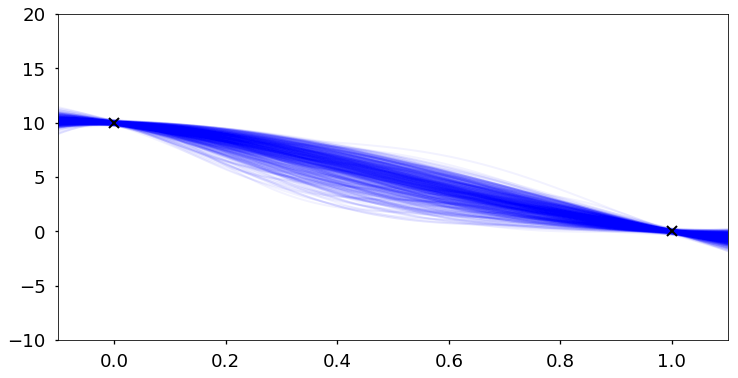

In [11]:
sample_df = m.get_samples_df(samples)
#plot the function posterior
xx = np.linspace(-0.1, 1.1, 100)[:,None]
plt.figure(figsize=(12, 6))
for i, s in sample_df.iterrows():
    m.set_parameter_dict(s)
    f = m.predict_f_samples(xx, 1)
    plt.plot(xx, f[0,:,:], 'b', lw=2, alpha = 0.05)
    
plt.plot(X, Y, 'kx', mew=2)
_ = plt.xlim(xx.min(), xx.max())
_ = plt.ylim(-10, 20)